## Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="40%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Sobre os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

## Configurando o Notebook e Importando os Dados

In [73]:
# pacotes de visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pacotes para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report,
                             roc_auc_score,
                             roc_curve,
                             precision_recall_curve)
from imblearn.under_sampling import RandomUnderSampler

# configurações de visualização
pd.set_option('display.max_columns', 100)

## Importando os Dados

In [2]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura Dataframe - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de Machine Learning.

# Análise Exploratória



Ao analisar as 5 primeiras linhas do dataframe, observamos que:
* A coluna `Time` e `Amount` foram preservadas, mantendo o valor original.
* A coluna `Time` está em segundos, representando o intervalo de tempo entre a primeira transação e as demais.
* Temos a coluna `Class` (variável alvo), onde:
  * 0 : Transação Normal;
  * 1 : Transação Fraudulenta

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Dimensões do Conjunto Original: ", df.shape)

Dimensões do Conjunto Original:  (284807, 31)


Verificando abaixo o resumo estatístico, por meio do método describe(), podemos confirmar que as variáveis relativas aos componentes principais (transformação PCA) não têm nenhuma discrepância aparente, bem como a coluna Time. Porém, vamos verificar de forma visual através de boxplots.


Em relação à variável Amount, nota-se que o valor médio de transações (considerando ambas as classes) é 88.34, mediana igual a 22.00 e desvio padrão de 250.12. Atingindo o valor máximo de 25691.16, a maioria das transações financeiras é composta em sua maioria por quantias menores - como esperado.

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Não verificamos a presença de dado nulo em nenhuma das colunas do dataset, o que é algo bom pois os modelos de Machine Learning possuem dificuldade para lidar com dados nulos, e consequentemente teriamos que tratar esses dados podendo alterar o resultado real do modelo.

In [6]:
df.isnull().sum().to_frame().T

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Verificamos que é uma base de dados totalmente desbalanceada, com 99.83% (284.315) dos dados para transações normais e apenas 0.17% (492) dos dados são transações fraudulentas. Esses resultados estão dentro do esperado quando trabalhamos com esse tipo de base de dados, pois espera-se que uma instituição financeira possua um volume irrisório de transações fraudulentas garantindo maior segurança para seus clientes, e também evitando perdas financeiras para a instituição como para o cliente.

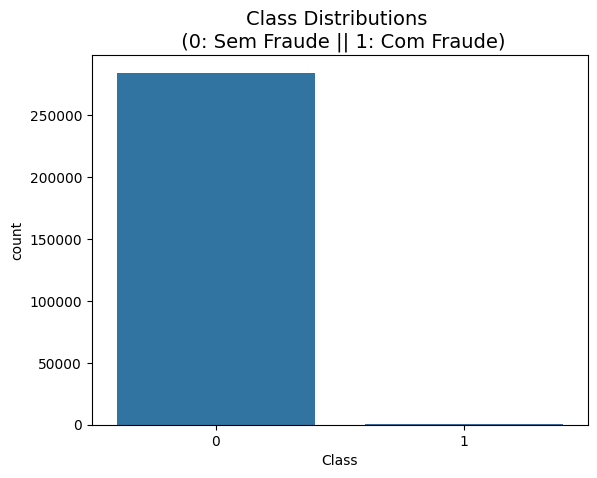

In [7]:
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: Sem Fraude || 1: Com Fraude)', fontsize=14);

In [8]:
print('Sem fraude', round(df['Class'].value_counts()[0]/len(df)*100,2),'% ou seja', df['Class'].value_counts()[0], 'transações')
print('Com fraude', round(df['Class'].value_counts()[1]/len(df)*100,2),'% ou seja', df['Class'].value_counts()[1], 'transações' )

Sem fraude 99.83 % ou seja 284315 transações
Com fraude 0.17 % ou seja 492 transações


Vamos então criar um filtro para ajudaar nas análises seguintes em relação aos dados de transações não fraudulentas e transações fraudulentas.

In [9]:
mask_true = (df['Class'] == 1)
mask_false = (df['Class'] == 0)

Plotaremos dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo `Time`.

No entanto, não foi identificada nenhum informação a partir das distribuições de frequência abaixo.

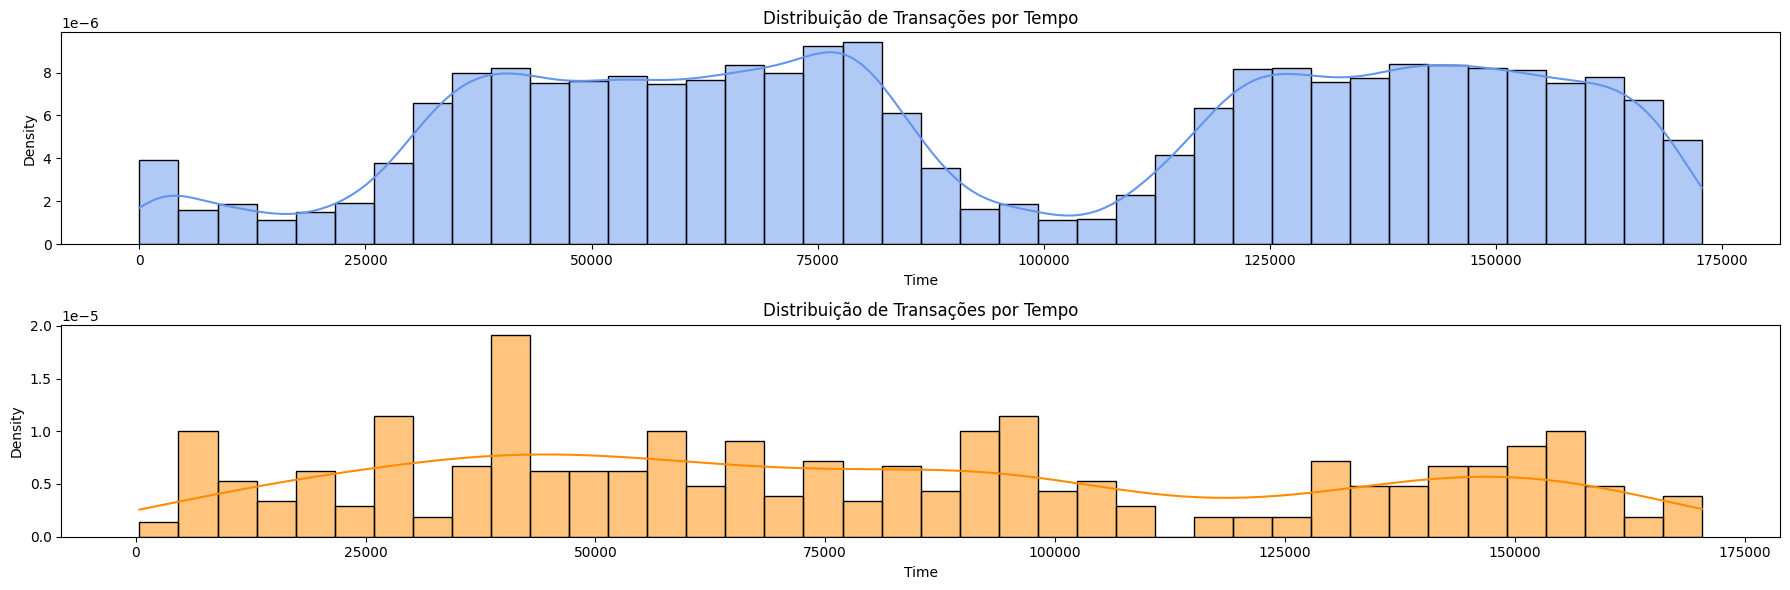

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(18,6))

sns.histplot(data=df[mask_false], x='Time', ax=ax[0],kde=True, stat='density',
             color='cornflowerblue', bins=40)
ax[0].set_title('Distribuição de Transações por Tempo')

sns.histplot(data=df[mask_true], x='Time', ax=ax[1],kde=True, stat='density', color='darkorange', bins=40)
ax[1].set_title('Distribuição de Transações por Tempo')

plt.tight_layout();

Ainda tentando extrair alguma informação da coluna `Time`, vamos criar uma coluna `Hour` para agruparmos os dados e verificarmos se existe alguma informação que possamos extrair.

Partimos do pressuposto que a base começa as 00:00 e vai até as 23:00.

Podemos observar que existem mais transações fraudulentas nos horários de 02:00 até 05:00, as 12:00 e em seguida das 17:00 as 19:00.

In [11]:
df['hour'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
df.pivot_table(values='Amount',index='hour',columns='Class',aggfunc='count').T

hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Class,,,,,,,,,,,,,,,,,,,,,,,,
0,10919,7687,4212,3269,3476,2185,2979,4093,7219,10266,15824,16593,16804,15400,15350,16545,16434,16435,16135,17003,15632,16739,17692,15424
1,21,6,10,57,17,23,11,9,23,9,16,8,53,17,17,23,26,22,29,33,19,18,16,9


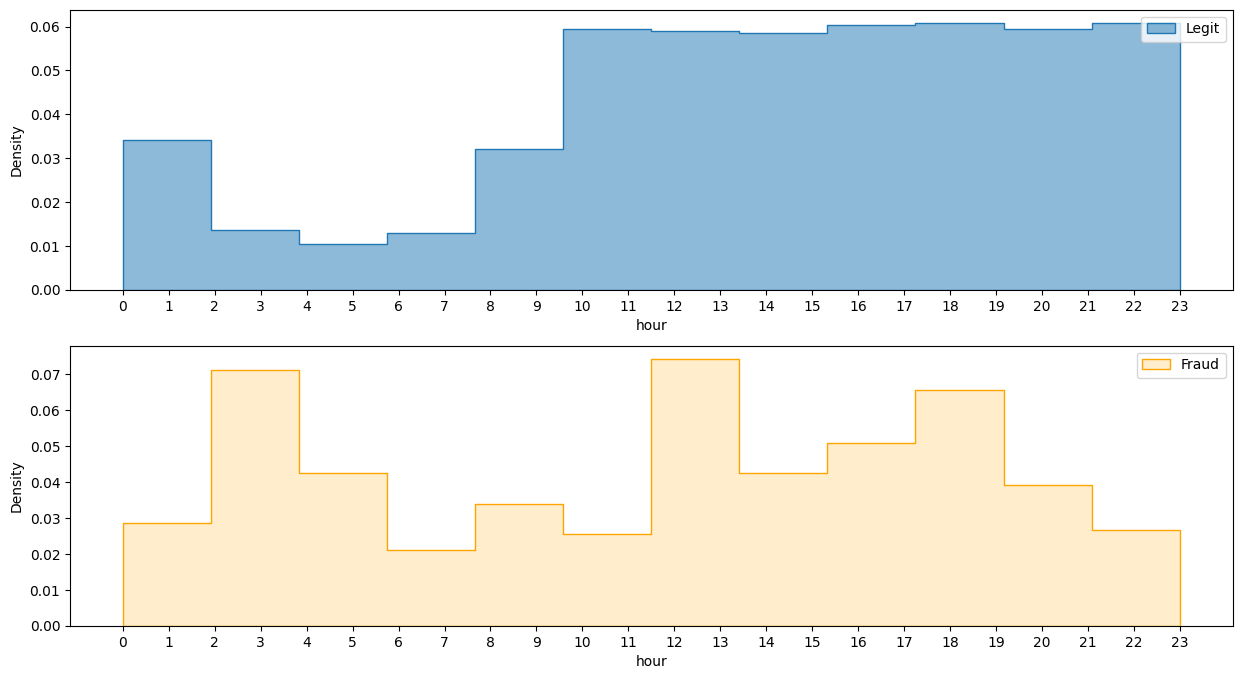

In [12]:
fig, ax = plt.subplots(2 , 1, figsize=(15,8))

sns.histplot(data=df[df['Class']== 0.0], x='hour',
             binwidth=2, element='step', stat='density',
             alpha=0.5, ax=ax[0], label='Legit')

ax[0].set_xticks(range(0,24));
ax[0].legend()

sns.histplot(data=df[df['Class']== 1.0], x='hour', color='orange',
             binwidth=2, element='step', stat='density',
             alpha=0.2, ax=ax[1],label='Fraud')
ax[1].set_xticks(range(0,24))
ax[1].legend();

### Analisando as Colunas

Fazer uma analise das colunas (features) é um passo importante para enterdemos melhor a nossa base de dados, sendo possível identificar comportamentos semelhantes ou distintos entre as classes para as mais diversas *features* disponíveis.

Outro ponto relevante é para a realização de *feature engineering*, que é o processo de criar novas colunas a partir das colunas (features) disponíveis no dataset, podendo revelar informações mais relevantes para o nosso modelo, como para *feature importance* - analisar a importância das variaveis para o modelo.

É possível observar que há uma variação significativa nas distribuições de algumas variáveis (como V4, V7, V12, V14, V17), indicando que essas variáveis podem ter padrões distintos em transações fraudulentas.


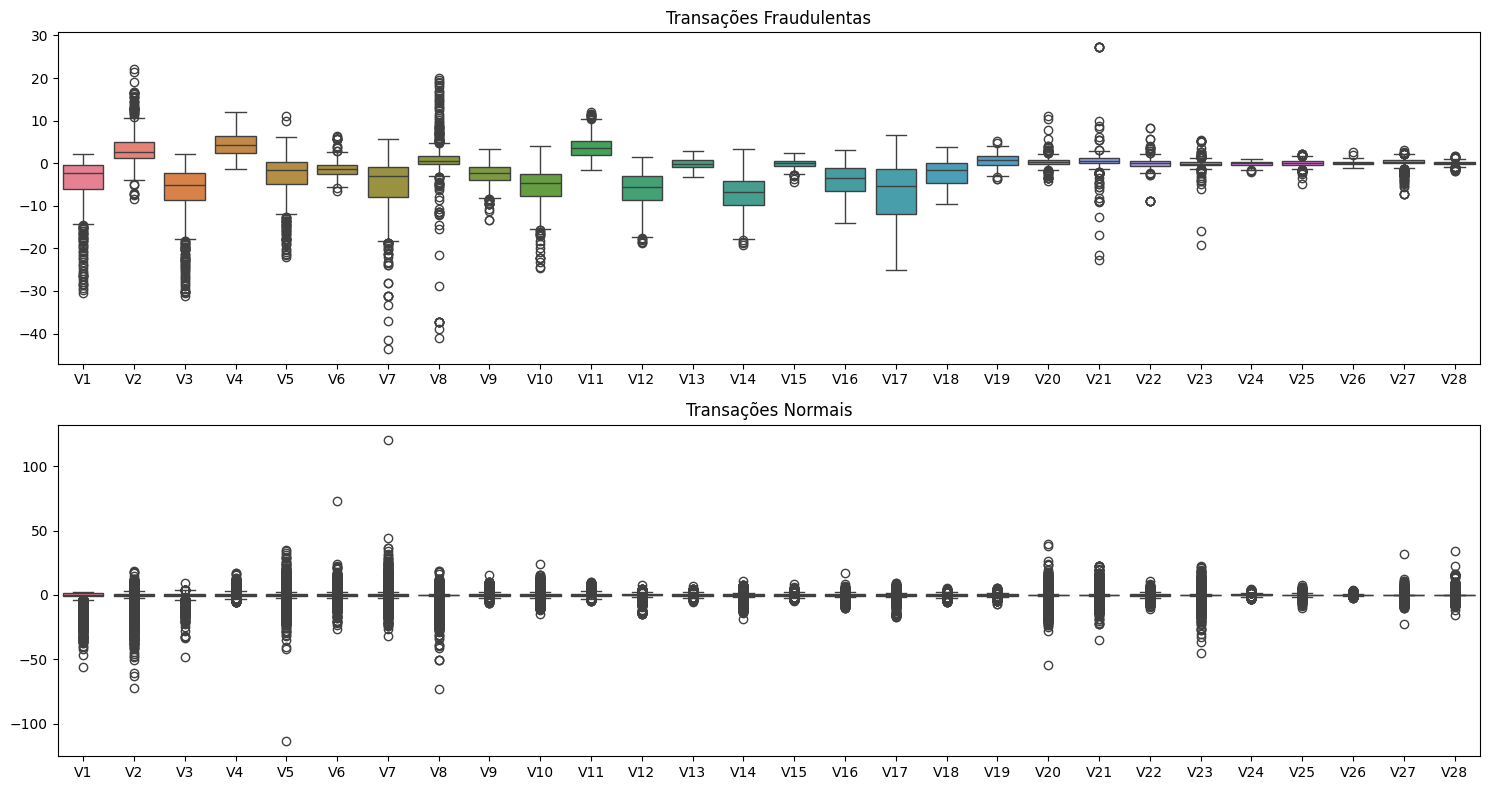

In [13]:
filtered_df = df.loc[:, ~df.columns.isin(['Time','hour','Class','Amount'])]

fig, ax = plt.subplots(2,1,figsize=(15,8))

sns.boxplot(data=filtered_df[mask_true], ax=ax[0])
ax[0].set_title('Transações Fraudulentas')

sns.boxplot(data=filtered_df[mask_false], ax=ax[1])
ax[1].set_title('Transações Normais')

plt.tight_layout();

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis `V3`, `V4`, `V10` e `V11`, como elas são bem distintas.

Por outro lado, variáveis como `V8`, `V13` e `V15` são muito similares, apresentando aproximadamente o mesmo comportamento.

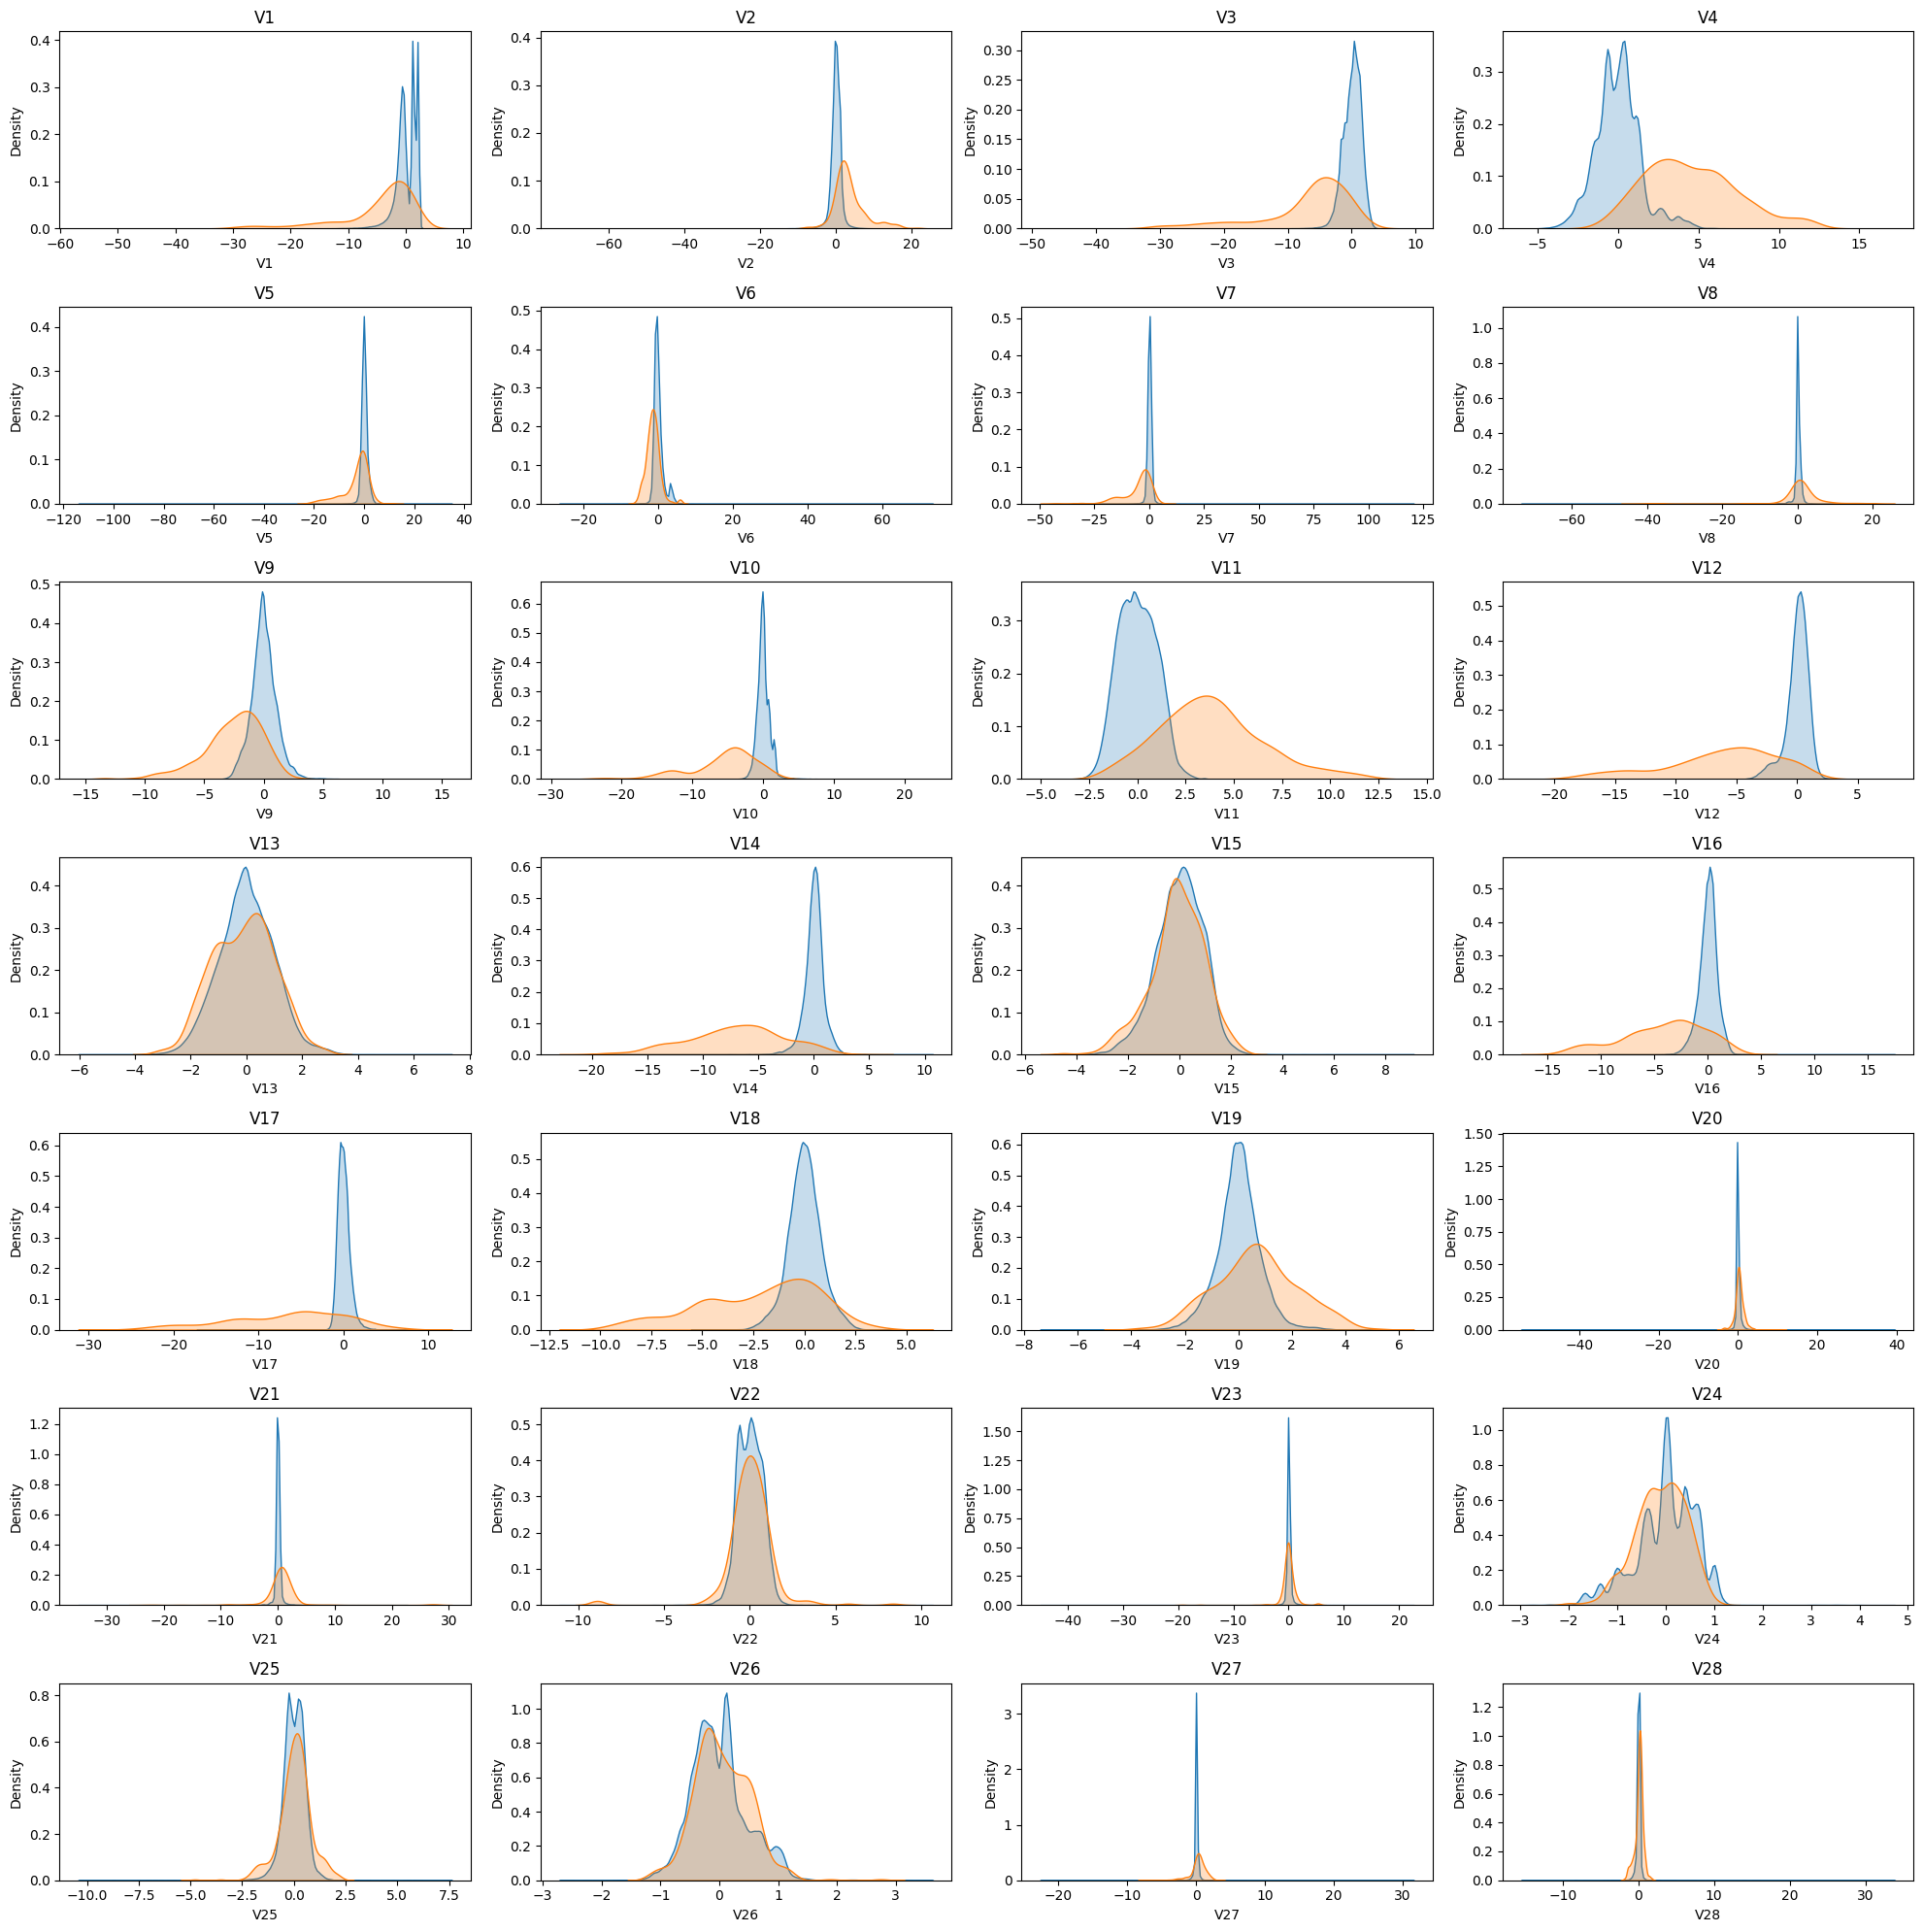

In [14]:
filtered_df = df.loc[:, ~df.columns.isin(['Time','hour','Amount','Class'])]
fig, ax = plt.subplots(7, 4, figsize=(20,20))
fig.subplots_adjust(wspace=1, hspace=1)

idx=0
for i in filtered_df.columns:
    idx += 1
    plt.subplot(7,4,idx)
    sns.kdeplot(df[i][mask_false], label='Legit', fill=True)
    sns.kdeplot(df[i][mask_true], label='Fraud', fill=True)
    plt.title(i)
plt.tight_layout()

Resumidamente, algumas observações principais que puderam ser extraídas dessa etapa exploratória foram:

* O *dataset* está muito desbalanceado, uma vez que as transações fraudulentas representam apenas 0,17% das entradas totais
* Não existem valores ausentes ou nulos no *dataframe*.
* Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa que as *features* originais foram padronizadas.
* As colunas `Time` e `Amount` não estão normalizadas.

# Modelos de Machine Learning

Nesta etapa iremos testar dois modelos de classificadores, sendo a Regressão Logística e Random Forest.

Apesar da base de dados estar desbalanceada, não iremos utilizar métodos como OverSample ou UnderSample num primeiro momento. Optamos por trabalhar com o parâmetro `class_weight`do scikit-learn para mensurarmos sua capacidade de lidar com dados desbalanceados. Após a análise dos modelos, iremos balancear através de um *UnderSample* e iremos verificar os resultados e decidir qual o melhor método e/ou modelo para o nosso problema.

## Modelos Class_Weight

### Preparação dos Dados desbalanceados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time`, `Amount` e `Hour`).
* Dividir o conjunto de dados entre treino, validação e teste.
* Iremos

Separando os dados de Teste

In [15]:
test = df.sample(frac=0.15, random_state=42)
df = df.drop(test.index)

Padronização dos dados de Treino e Validação

In [16]:
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df['Time'] = StandardScaler().fit_transform(df[['Time']])
df['hour'] = StandardScaler().fit_transform(df[['hour']])

In [52]:
features = df.drop('Class', axis=1)
target = df['Class']

x_train, x_val, y_train, y_val = train_test_split(features, target,stratify=target,
                                                    test_size=0.20, random_state=42)

Padronização dos dados de Teste

In [20]:
test['Amount'] = StandardScaler().fit_transform(test[['Amount']])
test['Time'] = StandardScaler().fit_transform(test[['Time']])
test['hour'] = StandardScaler().fit_transform(test[['hour']])

In [21]:
x_test = test.drop('Class', axis=1)
y_test = test['Class']

### Criando Função para analisar o custo do Erro
A função costed_error calcula um erro ponderado baseado no custo de falsos positivos (FP) e falsos negativos (FN). O objetivo é minimizar os custos associados a essas classificações incorretas.
* Se a classe real (_y) for 0 (não fraudulenta) e a previsão (y_hat) for 1, **falso positivo**, o custo é 1.
* Se a classe real (_y) for 1 (fraudulenta) e a previsão (y_hat) for 0, **falso negativo**, o custo é 50.

In [90]:
def costed_error(y, y_hat):
  sum = 0
  for _y, _y_hat in zip(y, y_hat):
    if _y != _y_hat:
      n = 1 if _y == 0 else 50
      sum += n
  return sum

### Criando o Modelo sem balancear a amostra

O parâmetro `Class_weight` é por definição atribuido o valor `None`.

Testamos dois modelos de regressão logistica, com o parametro igual a `Balanced` e com o padrão (`None`). Verificamos uma grande diferença entre os modelos na base de validação, onde o modelo desbalanceado teve um recall de 68% para class = 1 e uma AUC de 83.9% contra 93% de recall do modelo balanceado pelo parâmetro da função com uma AUC de 95%.

Porém quando analisamos os Falsos Positivos, observamos que a precisão do modelo balanceado é muito pior que o modelo desbalanceado, porem isso fica mascarado quando analisamos a pontuação do Custo do Erro, pois penalizamos menos os falsos positivos.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48334
           1       0.92      0.68      0.78        84

    accuracy                           1.00     48418
   macro avg       0.96      0.84      0.89     48418
weighted avg       1.00      1.00      1.00     48418

AUC:  0.8392339908612098


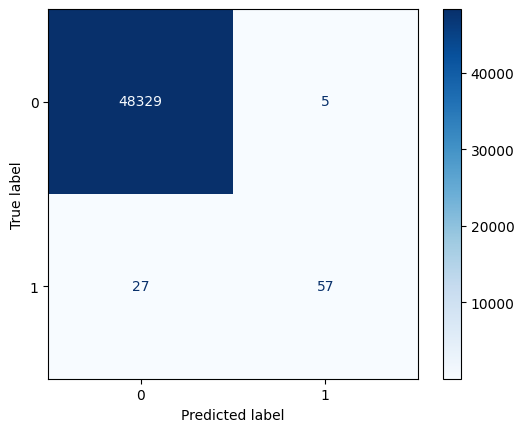

In [91]:
lr_unbalanced = LogisticRegression()
lr_unbalanced.fit(x_train, y_train)

y_pred = lr_unbalanced.predict(x_val)
y_proba = lr_unbalanced.predict_proba(x_val)

class_report = classification_report(y_val, y_pred)
print(class_report)
print('AUC: ', roc_auc_score(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay.from_estimator(lr_unbalanced, x_val, y_val, cmap='Blues')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     48334
           1       0.06      0.93      0.11        84

    accuracy                           0.98     48418
   macro avg       0.53      0.95      0.55     48418
weighted avg       1.00      0.98      0.99     48418

AUC:  0.9518927817744386


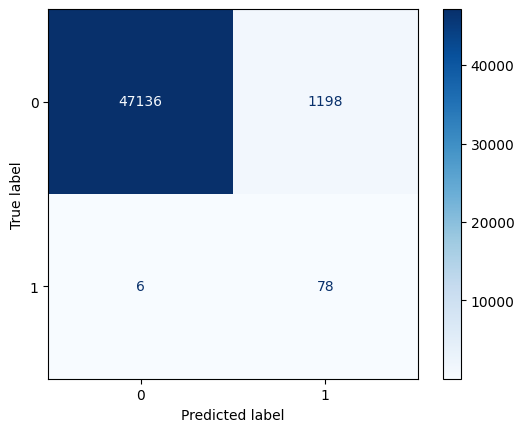

In [92]:
lr_balanced = LogisticRegression(class_weight='balanced')
lr_balanced.fit(x_train, y_train)

y_pred = lr_balanced.predict(x_val)
y_proba = lr_balanced.predict_proba(x_val)

class_report = classification_report(y_val, y_pred)
print(class_report)
print('AUC: ', roc_auc_score(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay.from_estimator(lr_balanced, x_val, y_val, cmap='Blues')
plt.show()

Testando a pontuação dos dois modelos:

In [93]:
print('pontuação modelo unbalanced:', costed_error(y_val, lr_unbalanced.predict(x_val)))
print('pontuação modelo balanced:', costed_error(y_val, lr_balanced.predict(x_val)))

pontuação modelo unbalanced: 1355
pontuação modelo balanced: 1498


### Testando os Modelos

Quando validamos o modelo na base de teste, verificamos uma piora nos dois modelos, tanto no modelo unbalanced, onde não foi definido nenhum parâmetro para este como para o modelo onde mudamos o `class_weight` para *Balanced*

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.86      0.58      0.69        74

    accuracy                           1.00     42721
   macro avg       0.93      0.79      0.85     42721
weighted avg       1.00      1.00      1.00     42721

AUC:  0.7904584714618246


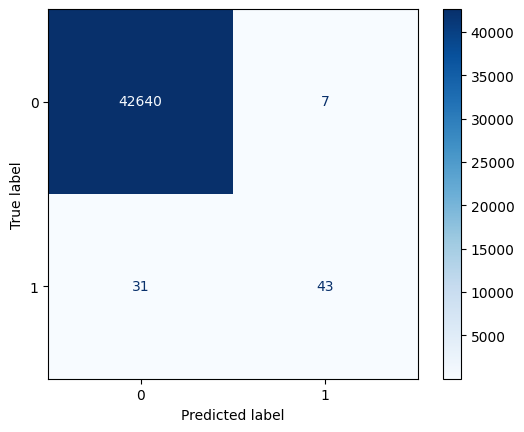

In [94]:
# Modelo Vanilla
y_pred = lr_unbalanced.predict(x_test)
y_proba = lr_unbalanced.predict_proba(x_test)

class_report = classification_report(y_test, y_pred)
print(class_report)
print('AUC: ', roc_auc_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(lr_unbalanced, x_test, y_test, cmap='Blues')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     42647
           1       0.05      0.89      0.10        74

    accuracy                           0.97     42721
   macro avg       0.53      0.93      0.54     42721
weighted avg       1.00      0.97      0.98     42721

AUC:  0.9320879957970493


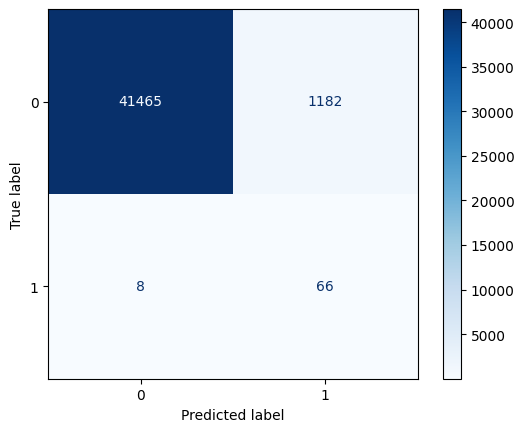

In [95]:
# Modelo Balanceado
y_pred = lr_balanced.predict(x_test)
y_proba = lr_balanced.predict_proba(x_test)

class_report = classification_report(y_test, y_pred)
print(class_report)
print('AUC: ', roc_auc_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(lr_balanced, x_test, y_test, cmap='Blues')
plt.show()

In [96]:
print('pontuação modelo unbalanced:', costed_error(y_val, lr_unbalanced.predict(x_test)))
print('pontuação modelo balanced:', costed_error(y_val, lr_balanced.predict(x_test)))

pontuação modelo unbalanced: 3650
pontuação modelo balanced: 4746


## Balanceado a amostra de dados

In [97]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x_train, y_train)

In [99]:
lr_unbalanced = LogisticRegression()
lr_unbalanced.fit(x_rus, y_rus)

y_pred = lr_unbalanced.predict(x_val)
y_proba = lr_unbalanced.predict_proba(x_val)

class_report = classification_report(y_val, y_pred)
print(class_report)
print('AUC: ', roc_auc_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     48334
           1       0.03      0.93      0.07        84

    accuracy                           0.96     48418
   macro avg       0.52      0.94      0.52     48418
weighted avg       1.00      0.96      0.98     48418

AUC:  0.9419308502148739


In [100]:
lr_balanced = LogisticRegression(class_weight='balanced')
lr_balanced.fit(x_rus, y_rus)

y_pred = lr_balanced.predict(x_val)
y_proba = lr_balanced.predict_proba(x_val)

class_report = classification_report(y_val, y_pred)
print(class_report)
print('AUC: ', roc_auc_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     48334
           1       0.03      0.93      0.07        84

    accuracy                           0.96     48418
   macro avg       0.52      0.94      0.52     48418
weighted avg       1.00      0.96      0.98     48418

AUC:  0.9419308502148739


In [101]:
print('pontuação modelo 1:', costed_error(y_val, lr_balanced.predict(x_rus)))
print('pontuação modelo 2:', costed_error(y_val, lr_unbalanced.predict(x_rus)))

pontuação modelo 1: 316
pontuação modelo 2: 316


### Validando os Modelos com a base balanceada

In [102]:
# Modelo Vanilla
y_pred = lr_unbalanced.predict(x_test)
y_proba = lr_unbalanced.predict_proba(x_test)

class_report = classification_report(y_test, y_pred)
print(class_report)
print('AUC: ', roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     42647
           1       0.03      0.91      0.07        74

    accuracy                           0.96     42721
   macro avg       0.52      0.93      0.52     42721
weighted avg       1.00      0.96      0.98     42721

AUC:  0.9302978442132426


In [107]:
# Modelo Balanceado
y_pred = lr_balanced.predict(x_test)
y_proba = lr_balanced.predict_proba(x_test)

class_report = classification_report(y_test, y_pred)
print(class_report)
print('AUC: ', roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     42647
           1       0.03      0.91      0.07        74

    accuracy                           0.96     42721
   macro avg       0.52      0.93      0.52     42721
weighted avg       1.00      0.96      0.98     42721

AUC:  0.9302978442132426


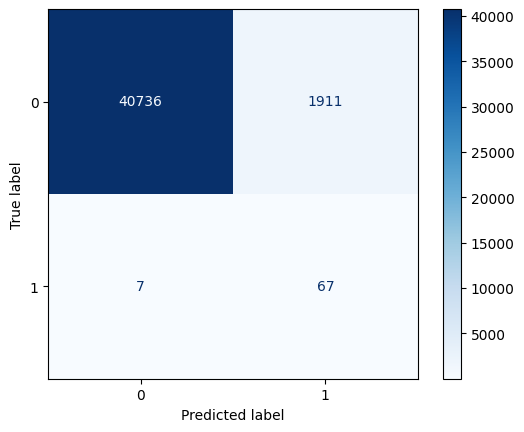

In [106]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(lr_balanced, x_test, y_test, cmap='Blues')
plt.show()

In [104]:
print('pontuação modelo 1:', costed_error(y_val, lr_balanced.predict(x_test)))
print('pontuação modelo 2:', costed_error(y_val, lr_unbalanced.predict(x_test)))

pontuação modelo 1: 5374
pontuação modelo 2: 5374


## Conclusão

Verificamos que o parâmetro `Class_Weight` do scikit-learn consegue desempenhar um papel relevante para criação de modelos de classificação, atingindo resultados bem semelhantes aos resultados após utilizarmos o RandomUnderSampler, que consiste em reduzir a amostra de dados de forma aleatória focando na classe majoritária.

Quando testamos o modelo, temos o resultado de 89% de recall do modelo class_weight = balanced contra 91% de recall do modelo após o RUS (RandomUnderSampler). Uma diferença de 2% que implica em uma diferença absoluta de 1 classifcação errada a mais.

Porém temos que considerar outros fatores ao utilizar o modelo, como o custo dos falsos positivos x falsos negativos pois o modelo onde a base foi balanceada previamente, apresentou mais falsos positivos que o modelo balanceado direto pela função do scikit-learn. Quando analisamos a função **Custo dos Erros** verificamos que há uma diferença entre os custos e também na AUC-Score, dando uma prefência ao modelo balanceado pelo paramêtro da função.

Sabemos que esse é um projeto mais complexo, que pode ser abordado de diversas formas, explorando os mais diversos modelos de classicação, explorando diversas técnicas para trabalhar com dataset desbalanceados além da hiper-parametrização dos modelos.